# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, plot_confusion_matrix, f1_score, recall_score, precision_score, classification_report 

**Importing Dataset**

In [2]:
cookies = pd.read_csv('../Data/cookies_clean.csv')

In [50]:
cookies_v2 = pd.read_csv('../Data/cookies_less_cleaned.csv')

In [3]:
cookies.head(3)

,Unnamed: 0,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,chocolate,raisins,oats,nuts,peanut butter
0,0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,1,15.2,0,1,0,0,0
1,1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,1,12.4,0,1,0,0,0
2,3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,1,12.2,1,0,0,0,0


In [52]:
cookies.drop('Unnamed: 0', axis=1, inplace=True)

In [53]:
cookies_v2.drop('Unnamed: 0', axis=1, inplace=True)

**Splitting data frame**

In [5]:
X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=0)

In [7]:
#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
log_model = LogisticRegression(max_iter=700, multi_class='multinomial')

In [9]:
log_model.fit(X_train_scale, y_train)

LogisticRegression(max_iter=700, multi_class='multinomial')

In [10]:
y_pred = log_model.predict(X_test_scale)

In [11]:
def model_scores(y_test, y_pred):
    print('R2:', round(r2_score(y_test, y_pred), 3))
    print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 3))
    print('Cohen Kappa Score:', round(cohen_kappa_score(y_test, y_pred), 3))
    print('MSE:', round(mean_squared_error(y_test, y_pred), 3))

In [12]:
model_scores(y_test, y_pred)

R2: 0.317
Accuracy Score: 0.57
Cohen Kappa Score: 0.333
MSE: 0.517


# KN Regressor

In [62]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies_v2.drop(['quality'], axis=1)
y = cookies_v2['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

for k in range(1, 20):
    Knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    Knn.fit(X_train_scale, y_train)
    y_pred = Knn.predict(X_test_scale)
    print('For k =', k)
    print('R2:', round(r2_score(y_test, y_pred), 3))
    print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))
    print(r2_score(y_test, y_pred) - mean_squared_error(y_test, y_pred, squared=False))
    print('')

For k= 1
R2: 0.609
RMSE: 0.836
-0.22665663744748465

For k= 2
R2: 0.693
RMSE: 0.742
-0.049000644436130725

For k= 3
R2: 0.724
RMSE: 0.703
0.02129077409973512

For k= 4
R2: 0.737
RMSE: 0.686
0.050432436050504736

For k= 5
R2: 0.747
RMSE: 0.674
0.07284313189593006

For k= 6
R2: 0.752
RMSE: 0.666
0.08581369935852678

For k= 7
R2: 0.757
RMSE: 0.66
0.09751613956063254

For k= 8
R2: 0.762
RMSE: 0.652
0.11009054638368376

For k= 9
R2: 0.761
RMSE: 0.654
0.10775620751027493

For k= 10
R2: 0.762
RMSE: 0.653
0.10815921889175784

For k= 11
R2: 0.761
RMSE: 0.654
0.10683827444626703

For k= 12
R2: 0.76
RMSE: 0.656
0.10442786881625954

For k= 13
R2: 0.761
RMSE: 0.655
0.10575608065433018

For k= 14
R2: 0.762
RMSE: 0.653
0.1088872463952143

For k= 15
R2: 0.762
RMSE: 0.653
0.10911382844310025

For k= 16
R2: 0.761
RMSE: 0.654
0.10732433209784176

For k= 17
R2: 0.761
RMSE: 0.654
0.10792286990016187

For k= 18
R2: 0.763
RMSE: 0.652
0.11049672524025955

For k= 19
R2: 0.762
RMSE: 0.653
0.1094207435361031



In [63]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

for k in range(1, 20):
    Knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    Knn.fit(X_train_scale, y_train)
    y_pred = Knn.predict(X_test_scale)
    print('For k =', k)
    print('R2:', round(r2_score(y_test, y_pred), 3))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
    print(r2_score(y_test, y_pred) - mean_squared_error(y_test, y_pred, squared=False))
    print('')

For k= 1
R2: 0.369
RMSE: 0.702
-0.33320302486666176

For k= 2
R2: 0.466
RMSE: 0.646
-0.1797714579742421

For k= 3
R2: 0.519
RMSE: 0.613
-0.09478535040046154

For k= 4
R2: 0.556
RMSE: 0.589
-0.03290839492041431

For k= 5
R2: 0.567
RMSE: 0.582
-0.01541961080010279

For k= 6
R2: 0.577
RMSE: 0.575
0.0017013402231457198

For k= 7
R2: 0.578
RMSE: 0.574
0.0044443984550760485

For k= 8
R2: 0.582
RMSE: 0.571
0.011075348377005523

For k= 9
R2: 0.587
RMSE: 0.568
0.018595142693164535

For k= 10
R2: 0.593
RMSE: 0.564
0.02887435394836002

For k= 11
R2: 0.6
RMSE: 0.559
0.0409575982917868

For k= 12
R2: 0.6
RMSE: 0.559
0.04147929228111946

For k= 13
R2: 0.6
RMSE: 0.559
0.0416155837022798

For k= 14
R2: 0.599
RMSE: 0.56
0.03968074105979402

For k= 15
R2: 0.604
RMSE: 0.557
0.04689806660817608

For k= 16
R2: 0.607
RMSE: 0.554
0.05253945303768193

For k= 17
R2: 0.607
RMSE: 0.554
0.052556105359243266

For k= 18
R2: 0.608
RMSE: 0.553
0.055230453273694136

For k= 19
R2: 0.608
RMSE: 0.553
0.054849247549396574

In [41]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


Knn = KNeighborsRegressor(metric='wminkowski', p=2, 
                           metric_params={'w': np.random.random(X_train.shape[1])})
Knn.fit(X_train_scale, y_train)
y_pred = Knn.predict(X_test_scale)
print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print('')

R2: 0.395
RMSE: 0.688



In [64]:
# with MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

for k in range(1, 20):
    Knn = KNeighborsRegressor(n_neighbors = k)
    Knn.fit(X_train_scale, y_train)
    y_pred = Knn.predict(X_test_scale)
    print('For k =', k)
    print('R2:', round(r2_score(y_test, y_pred), 3))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
    print(r2_score(y_test, y_pred) - mean_squared_error(y_test, y_pred, squared=False))
    print('')

For k = 1
R2: 0.341
RMSE: 0.718
-0.3768023091868492

For k = 2
R2: 0.422
RMSE: 0.672
-0.2497996645079934

For k = 3
R2: 0.432
RMSE: 0.666
-0.23379090436420003

For k = 4
R2: 0.437
RMSE: 0.663
-0.22663964873265885

For k = 5
R2: 0.446
RMSE: 0.658
-0.21131767083957242

For k = 6
R2: 0.459
RMSE: 0.65
-0.19185498557058167

For k = 7
R2: 0.463
RMSE: 0.648
-0.18493899652364798

For k = 8
R2: 0.467
RMSE: 0.646
-0.179010477465264

For k = 9
R2: 0.466
RMSE: 0.646
-0.1804742494553001

For k = 10
R2: 0.465
RMSE: 0.647
-0.18152430550098175

For k = 11
R2: 0.465
RMSE: 0.646
-0.18104514978058506

For k = 12
R2: 0.471
RMSE: 0.643
-0.17227538946007848

For k = 13
R2: 0.473
RMSE: 0.642
-0.16951447558868082

For k = 14
R2: 0.472
RMSE: 0.642
-0.1705980071093558

For k = 15
R2: 0.473
RMSE: 0.642
-0.16891172670792598

For k = 16
R2: 0.472
RMSE: 0.642
-0.1696992805538825

For k = 17
R2: 0.473
RMSE: 0.642
-0.16862627655651075

For k = 18
R2: 0.473
RMSE: 0.642
-0.1685500500365027

For k = 19
R2: 0.469
RMSE: 0

In [42]:
#with Standard Scaler and dropping more columns
from sklearn.neighbors import KNeighborsRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

for k in range(1, 20):
    Knn = KNeighborsRegressor(n_neighbors = k)
    Knn.fit(X_train_scale, y_train)
    y_pred = Knn.predict(X_test_scale)
    print('For k=', k)
    print('R2:', round(r2_score(y_test, y_pred), 3))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
    print('')

For k= 1
R2: 0.369
RMSE: 0.702

For k= 2
R2: 0.408
RMSE: 0.68

For k= 3
R2: 0.436
RMSE: 0.664

For k= 4
R2: 0.457
RMSE: 0.651

For k= 5
R2: 0.46
RMSE: 0.65

For k= 6
R2: 0.458
RMSE: 0.651

For k= 7
R2: 0.455
RMSE: 0.652

For k= 8
R2: 0.456
RMSE: 0.652

For k= 9
R2: 0.46
RMSE: 0.649

For k= 10
R2: 0.466
RMSE: 0.646

For k= 11
R2: 0.474
RMSE: 0.641

For k= 12
R2: 0.47
RMSE: 0.644

For k= 13
R2: 0.467
RMSE: 0.645

For k= 14
R2: 0.464
RMSE: 0.647

For k= 15
R2: 0.469
RMSE: 0.644

For k= 16
R2: 0.471
RMSE: 0.643

For k= 17
R2: 0.468
RMSE: 0.645

For k= 18
R2: 0.468
RMSE: 0.645

For k= 19
R2: 0.468
RMSE: 0.645



# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scale, y_train)

y_pred = reg.predict(X_test_scale)
y_test_predict= RFR.predict(X_test)

print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.463
RMSE: 0.6476841166543369


# Lasso Regression

In [21]:
from sklearn import linear_model

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train_scale, y_train) 

pred_test_lasso= model_lasso.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R2 Score:', r2_score(y_test, pred_test_lasso))

RMSE: 0.6931989983754325
R2 Score: 0.38516132557588123


In [22]:
from sklearn import linear_model

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train_scale, y_train) 

pred_test_lasso= model_lasso.predict(X_test_scale)
print('MSE:', mean_squared_error(y_test,pred_test_lasso)) 
print('R2 Score:', r2_score(y_test, pred_test_lasso))

MSE: 0.7000303851541965
R2 Score: 0.10430073937533246


# Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

rr = Ridge(alpha=0.01)
rr.fit(X_train_scale, y_train) 

pred_test_rr= rr.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2 Score:', r2_score(y_test, pred_test_rr))

RMSE: 0.647684209640602
R2 Score: 0.46325013615401944


In [45]:
from sklearn.linear_model import Ridge

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

rr = Ridge(alpha=0.01)
rr.fit(X_train_scale, y_train) 

pred_test_rr= rr.predict(X_test_scale)
print('MSE:', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2 Score:', r2_score(y_test, pred_test_rr))

MSE: 0.6476860253845842
R2 Score: 0.4632471266574566


# ElasticNet Regression

In [28]:
from sklearn.linear_model import ElasticNet

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train_scale, y_train) 

pred_test_model_enet= model_enet.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test_model_enet))) 
print('R2 Score:', r2_score(y_test, pred_test_model_enet))

RMSE: 0.6490247278134731
R2 Score: 0.46102600427679885


In [29]:
from sklearn.linear_model import ElasticNet

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train_scale, y_train) 


pred_test_enet= rr.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test_enet))) 
print('R2 Score:', r2_score(y_test, pred_test_enet))

RMSE: 0.6476860253845842
R2 Score: 0.4632471266574566


# Random Forrests

In [34]:
from sklearn.ensemble import RandomForestRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

RFR = RandomForestRegressor(max_depth=15)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_train)
y_test_pred= RFR.predict(X_test)

print('R2 Score', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 Score 0.5950828024900405
RMSE: 0.5625491190515192


In [6]:
#transforming test data frame

test = pd.read_csv('../Data/cookies_validate.csv')

#dropping
test.drop('id', axis=1, inplace=True)
test.drop('quality', axis=1, inplace=True)
test.drop(['density', 'crunch factor', 'aesthetic appeal', 'diameter'], axis=1, inplace=True)

#making dummies
#butter types
test['butter type'] = test['butter type'].replace('melted', 1).replace('cubed', 0)

#mixins
mixins_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

for x in mixins_list:
    test[x] = 0
    test[x] = test['mixins'].str.contains(x).astype(int)

test.drop('mixins', axis=1, inplace=True)

In [37]:
quality_pred = RFR.predict(test)
quality_pred

array([7.64967033, 7.76968275, 7.82248288, 8.22540676, 7.60662791,
       7.36555051, 7.94073427, 7.56140842, 7.46511562, 7.89046903,
       7.97597346, 8.11162004, 7.25683923, 7.9033864 , 8.06106484,
       7.77935754, 8.15597612, 7.78527173, 8.03918946, 8.51028551,
       7.86159399, 8.49437167, 8.29754556, 7.76663937, 7.14350477,
       7.06215909, 7.77482626, 7.33156902, 7.03197747, 7.42663106,
       7.99567379, 7.83347024, 7.28174112, 8.24843168, 8.20817977,
       7.86629424, 8.08834925, 8.30631707, 7.02808252, 7.80218611,
       8.11774475, 6.75761905, 7.84093008, 7.44077743, 7.42296224,
       7.60440728, 7.30805378, 8.19857331, 7.70764594, 7.87954272,
       7.12182477, 7.53137318, 7.40968455, 7.9405087 , 7.80489854,
       8.31690808, 7.71168827, 7.71444444, 7.93288668, 8.67625939,
       7.51647604, 7.7721869 , 7.4204    , 8.22906411, 8.00611742,
       7.84848614, 7.58138072, 7.6228658 , 7.35300673, 8.06860836,
       8.04940664, 8.26678704, 6.55919256, 7.01686808, 8.02864

In [38]:
test

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,butter type,weight,chocolate,raisins,oats,nuts,peanut butter
0,0.62,19.25,400.0,41.0,172.0,7.98,0.67,9.7,1,16.6,1,0,0,1,0
1,0.35,1.00,520.0,35.0,146.0,8.45,0.44,10.0,1,13.8,1,0,0,0,0
2,0.39,10.40,440.0,20.0,142.0,8.20,0.53,10.0,1,17.0,1,0,0,0,0
3,0.33,1.10,570.0,21.0,82.0,8.32,0.46,10.9,1,12.4,1,0,1,0,0
4,0.37,13.50,600.0,52.0,192.0,8.00,0.44,9.1,1,14.8,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0.02,1.90,780.0,18.0,30.0,8.40,0.75,9.8,0,13.8,1,0,1,1,0
775,0.19,5.20,940.0,19.0,98.0,8.16,0.52,9.6,0,14.8,0,0,1,1,0
776,0.00,2.10,600.0,6.0,13.0,8.59,0.61,10.0,0,12.4,0,0,1,1,0
777,0.08,2.30,670.0,19.0,32.0,8.52,0.57,11.0,0,13.4,0,0,0,0,1


In [ ]:
test['quality_pred'] = quality_pred

In [ ]:
test

In [ ]:
test.to_csv('../Data/firsttry_sarahlisa.csv')

In [39]:
cookies['quality'].value_counts()

8    1580
7    1033
9     672
6     354
Name: quality, dtype: int64

In [65]:
cookies_v2['quality'].value_counts()

8     1778
7     1316
9      706
6      614
5      575
10     135
4       44
3        8
11       5
Name: quality, dtype: int64

# Third Try (weighted KNN)

In [3]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies_v2.drop(['quality'], axis=1)
y = cookies_v2['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 18, weights = 'distance')
Knn.fit(X_train_scale, y_train)
y_pred = Knn.predict(X_test_scale)
print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

NameError: name 'cookies_v2' is not defined

In [77]:
#scaling test data set
scaler.fit(test)

StandardScaler()

In [78]:
quality_pred = Knn.predict(test)
quality_pred

array([5.38704993, 5.38722922, 5.3869995 , 5.38720569, 5.38751015,
       5.38722751, 5.3871728 , 5.3870779 , 5.38690633, 5.38732026,
       5.38698255, 5.3868255 , 5.38686029, 5.38640272, 5.38625202,
       5.38707322, 5.38737022, 5.38724725, 5.38496603, 5.38658055,
       5.38689407, 5.3873476 , 5.38604394, 5.38725817, 5.38710495,
       5.38717786, 5.38717744, 5.38692328, 5.38735504, 5.38719867,
       5.38736161, 5.38723377, 5.38725952, 5.38707847, 5.38648933,
       5.38707154, 5.38692807, 5.38650497, 5.38675979, 5.38735029,
       5.38702989, 5.3866909 , 5.38729703, 5.38655705, 5.38758883,
       5.3874265 , 5.3877027 , 5.3866808 , 5.38723128, 5.38732877,
       5.38702696, 5.38723363, 5.38663513, 5.38696061, 5.3872529 ,
       5.38687857, 5.38700184, 5.38700121, 5.38628818, 5.38630421,
       5.38745797, 5.38718304, 5.38658026, 5.38651507, 5.38692196,
       5.38696876, 5.38712557, 5.3874057 , 5.38736811, 5.38695428,
       5.38720493, 5.38612515, 5.38720985, 5.38712766, 5.38679

<AxesSubplot:>

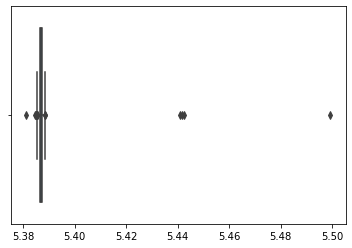

In [79]:
import seaborn as sns
sns.boxplot(x=quality_pred)

In [4]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 18, weights = 'distance')
Knn.fit(X_train_scale, y_train)
y_pred = Knn.predict(X_test_scale)
print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

R2: 0.688
RMSE: 0.714


In [7]:
#scaling test data set
scaler.fit(test)
quality_pred = Knn.predict(test)
quality_pred

ValueError: query data dimension must match training data dimension

<AxesSubplot:>

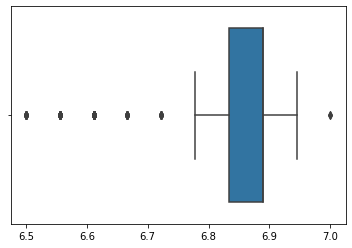

In [82]:
sns.boxplot(x=quality_pred)